Correlation plot for ATAC and methylation data

In [18]:
library(tidyverse)
library(ggplot2)

In [7]:
meth_df <- readRDS("../data/methylation/methylation_preprocessed_FILTERED.rds")
colnames(meth_df) <- c("bin", "Methylation")

ATAC_data <- read.table("../data/ATACseq_250kb_bins.txt")
colnames(ATAC_data) = c("bin", "ATAC")
ATAC_data$ATAC = as.character(ATAC_data$ATAC)
ATAC_data$ATAC = as.numeric(ATAC_data$ATAC)
head(ATAC_data)
str(ATAC_data)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

bin,ATAC
chr1_0,0.05376791
chr10_0,0.29698782
chr10_1,0.40893151
chr10_10,0.30582283
chr10_100,0.59316570
chr10_101,0.47641373


'data.frame':	11515 obs. of  2 variables:
 $ bin : Factor w/ 11515 levels "chr1_0","chr1_1",..: 1 998 999 1000 1001 1002 1003 1004 1005 1006 ...
 $ ATAC: num  0.0538 0.297 0.4089 0.3058 0.5932 ...


In [5]:
head(ATAC_data)
dim(ATAC_data)

bin,ATAC
chr1_0,0.05376791
chr10_0,0.29698782
chr10_1,0.40893151
chr10_10,0.30582283
chr10_100,0.59316570
chr10_101,0.47641373


[1] 11515     2

In [8]:
head(meth_df)
dim(meth_df)

bin,Methylation
chr1_3,50.85448
chr1_4,59.94958
chr1_5,66.37292
chr1_7,54.63748
chr1_8,67.25908
chr1_9,52.50686


[1] 10019     2

In [9]:
data <- dplyr::inner_join(ATAC_data,meth_df, by = "bin")

In [10]:
head(data)

bin,ATAC,Methylation
chr10_1,0.4089315,69.28076
chr10_10,0.3058228,36.89330
chr10_100,0.5931657,58.66910
chr10_101,0.4764137,42.84426
chr10_102,0.2862775,32.69127
chr10_103,0.3169988,33.14599


In [11]:
dim(data)

[1] 10019     3

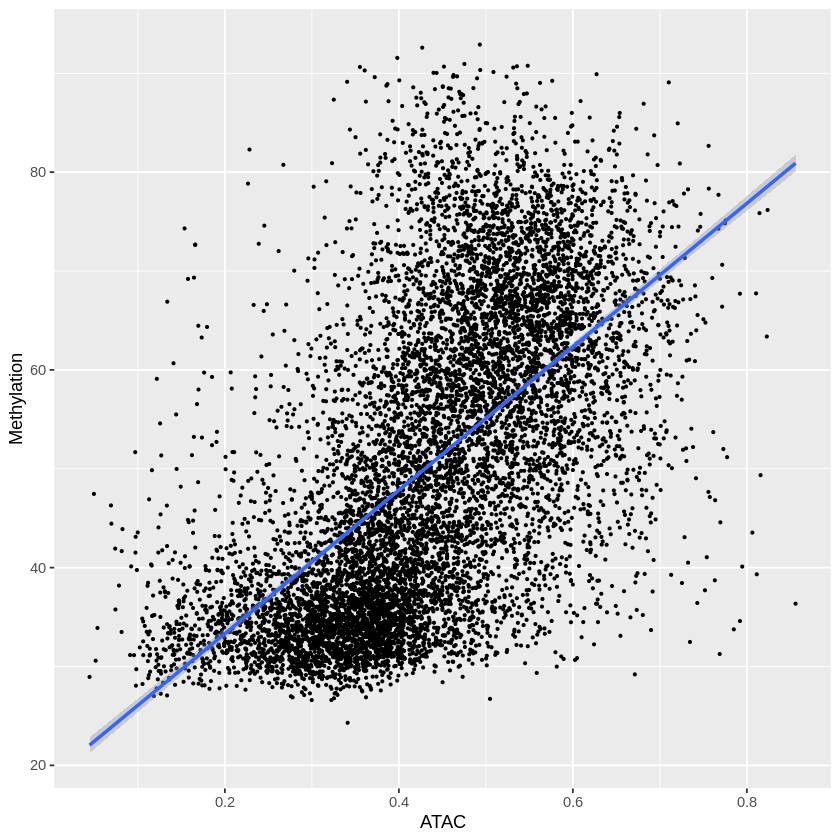

In [21]:


ggplot(data, aes(x = ATAC, y = Methylation)) + 
    geom_point(size = 0.5) + 
    geom_smooth(method = "lm", formula = y~x)

In [22]:
cor(data$ATAC, data$Methylation)

[1] 0.5926526